# GME Regression - von Manuel Knepper

Wir verwenden die Forecast-Library für die Erstellung von linearen Modellen mit TimeSeries-Objekten

In [3]:
library(forecast) #wird für tslm benötigt

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Einlesung der Daten

In [5]:
GME <- read.csv('C:/Users/S.Faltenberg/Desktop/FHDW/5. Semester/Data Lab/gameStopStockPrediction-master/input/GME_CloseAndReddit_previous_polish_04Jan_11May.csv')

Der Plot der Kursdaten zeigt den Verlauf über den beobachteten Zeitraum, der Verlauf wirkt wenig linear.
Darstellung der genutzten Kursdaten

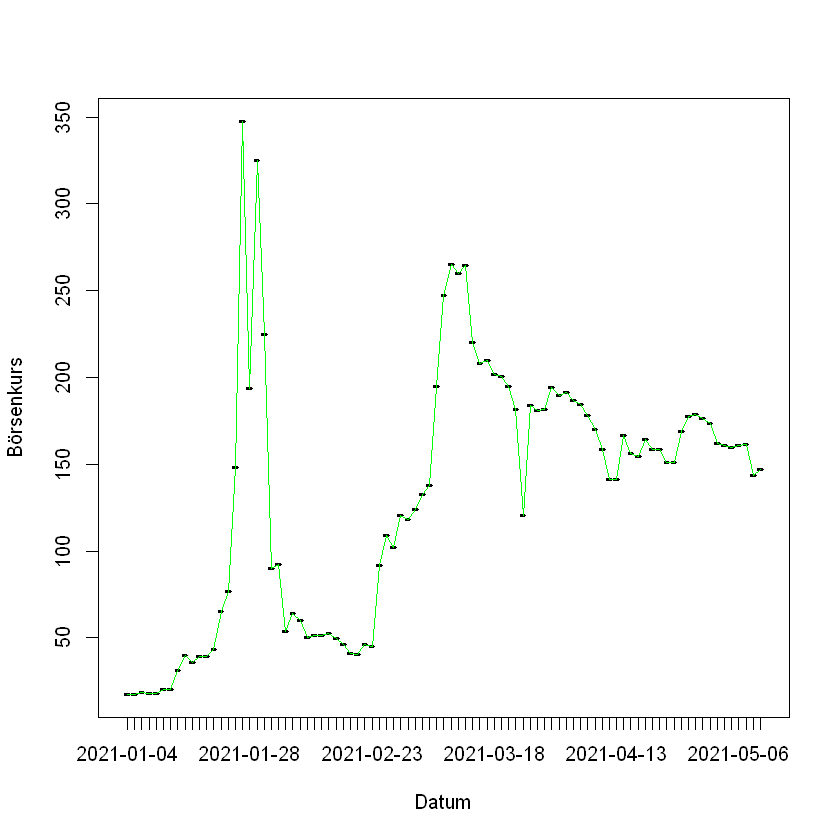

In [6]:
plot(GME$Date, GME$Close,ylab = "Börsenkurs", xlab = "Datum")
lines(GME$Date, GME$Close, col = "green")

Regression nur mit Kursdaten

Die erste Regressionanalyse führen wir lediglich mit den Kursdaten durch, um nachher einen Vergleich ziehen zu können, ob die Vorhersage unter Einbeziehung der Kommentare bessere Ergebnisse liefert.


Einfügen der Kursdaten in TimeSeries-Objekt

In [7]:
kurse.ts<-ts(GME$Close)

Wir trennen die vorliegenden Daten in Trainings- und Kursdaten, hierbei wählen wir einen 80/20 Split. 80% der Daten werden als Trainingsdaten verwendet, während 20% später zur Validierung des Modells genutzt werden.
Trennung in Traingsdaten und Validierungsdate

In [8]:
stepsAhead <-18 #Anzahl Prognosetage
nTrain <-length(kurse.ts) - stepsAhead
train.kurse.ts <-window(kurse.ts, start = 1, end = c(1, nTrain))
valid.kurse.ts <-window(kurse.ts, start = c(1, nTrain +1), end = c(1, nTrain+stepsAhead))

Wir führen drei verschiedene Regressionen durch: mit linearem Trend, mit polynomialem Trend 2. Ordnung sowie einem polynomialem Trend 3. Ordnung. Wir erhöhen die polynomiale Potenz nicht weiter, da es sonst zu Overfitting kommt, dies wollen wir vermeiden.
#Regression mit linearem Trend


Call:
tslm(formula = train.kurse.ts ~ trend)

Residuals:
   Min     1Q Median     3Q    Max 
-77.71 -37.70 -18.67  10.47 267.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.0025    16.0012   2.500   0.0148 *  
trend         2.3621     0.3863   6.115 5.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.7 on 69 degrees of freedom
Multiple R-squared:  0.3515,	Adjusted R-squared:  0.3421 
F-statistic:  37.4 on 1 and 69 DF,  p-value: 5.115e-08


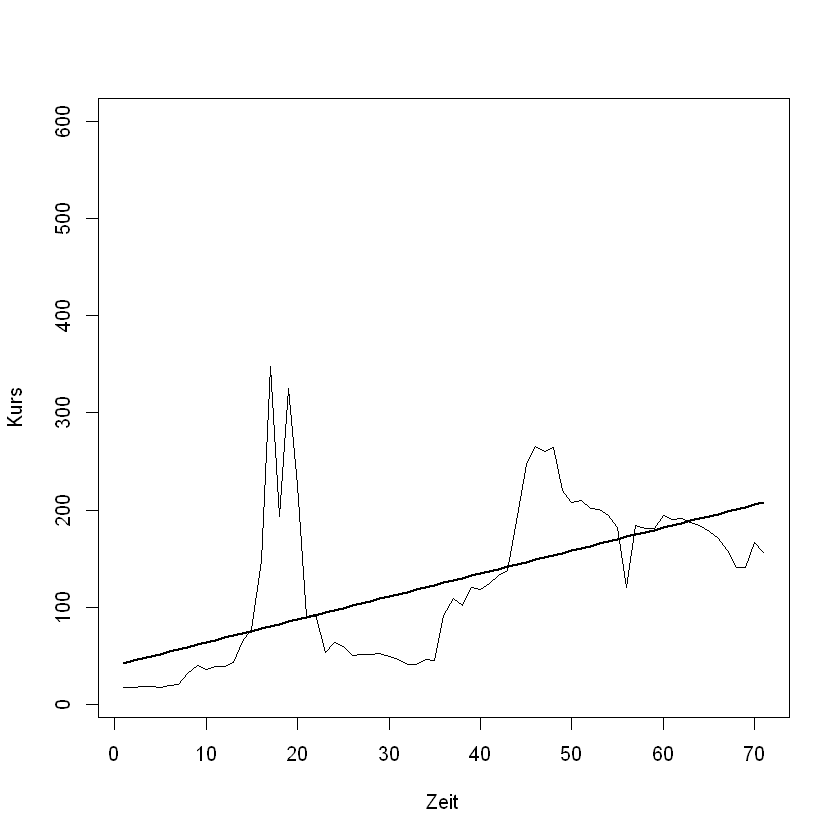

In [9]:
kurse.lm1 <- tslm(train.kurse.ts ~ trend)
summary(kurse.lm1)
plot(train.kurse.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(kurse.lm1$fitted, lwd = 2)

Regression mit polynomialenm Trend 2. Ordnung


Call:
tslm(formula = train.kurse.ts ~ poly(trend, 2))

Residuals:
   Min     1Q Median     3Q    Max 
-90.32 -35.91 -13.19  12.30 265.57 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      125.039      7.855  15.917  < 2e-16 ***
poly(trend, 2)1  407.902     66.192   6.162 4.41e-08 ***
poly(trend, 2)2  -95.260     66.192  -1.439    0.155    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.19 on 68 degrees of freedom
Multiple R-squared:  0.3706,	Adjusted R-squared:  0.3521 
F-statistic: 20.02 on 2 and 68 DF,  p-value: 1.454e-07


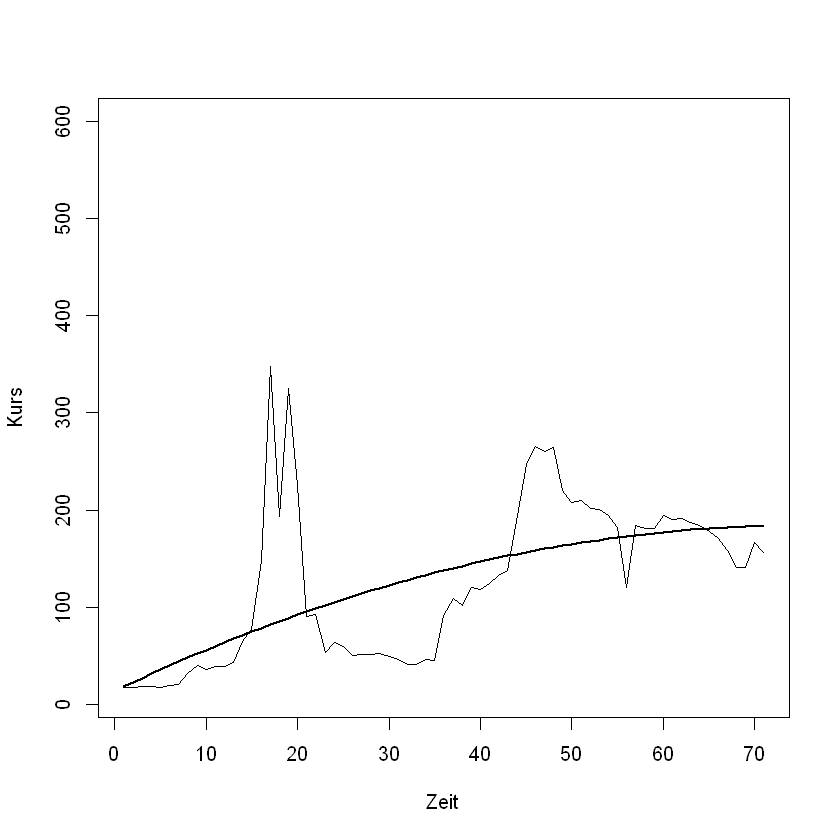

In [10]:
kurse.lm2 <- tslm(train.kurse.ts ~ poly(trend, 2))
summary(kurse.lm2)
plot(train.kurse.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(kurse.lm2$fitted, lwd = 2)

Regression mit polynomialenm Trend 3. Ordnung


Call:
tslm(formula = train.kurse.ts ~ poly(trend, 3))

Residuals:
    Min      1Q  Median      3Q     Max 
-89.545 -31.785 -17.095   9.675 273.282 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      125.039      7.868  15.891  < 2e-16 ***
poly(trend, 3)1  407.902     66.300   6.152 4.81e-08 ***
poly(trend, 3)2  -95.260     66.300  -1.437    0.155    
poly(trend, 3)3  -58.475     66.300  -0.882    0.381    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.3 on 67 degrees of freedom
Multiple R-squared:  0.3779,	Adjusted R-squared:   0.35 
F-statistic: 13.56 on 3 and 67 DF,  p-value: 5.171e-07


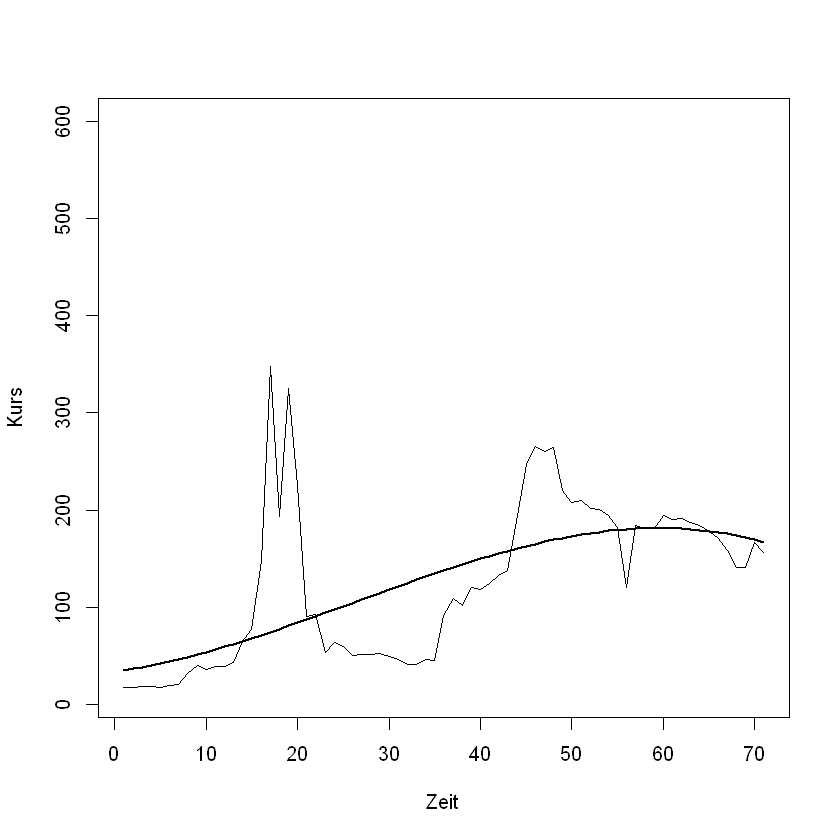

In [11]:
kurse.lm3 <- tslm(train.kurse.ts ~ poly(trend, 3))
summary(kurse.lm3)
plot(train.kurse.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(kurse.lm3$fitted, lwd = 2)

Nachdem wir Regressionsmodelle erstellt haben, können wir diese nun mithilfe der Validierungsdaten auf ihre Performance testen.
Forecasts mit linearem Trend

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-68.58768,70.66705,68.58768,-43.08481,43.08481,0.7535397,9.036555


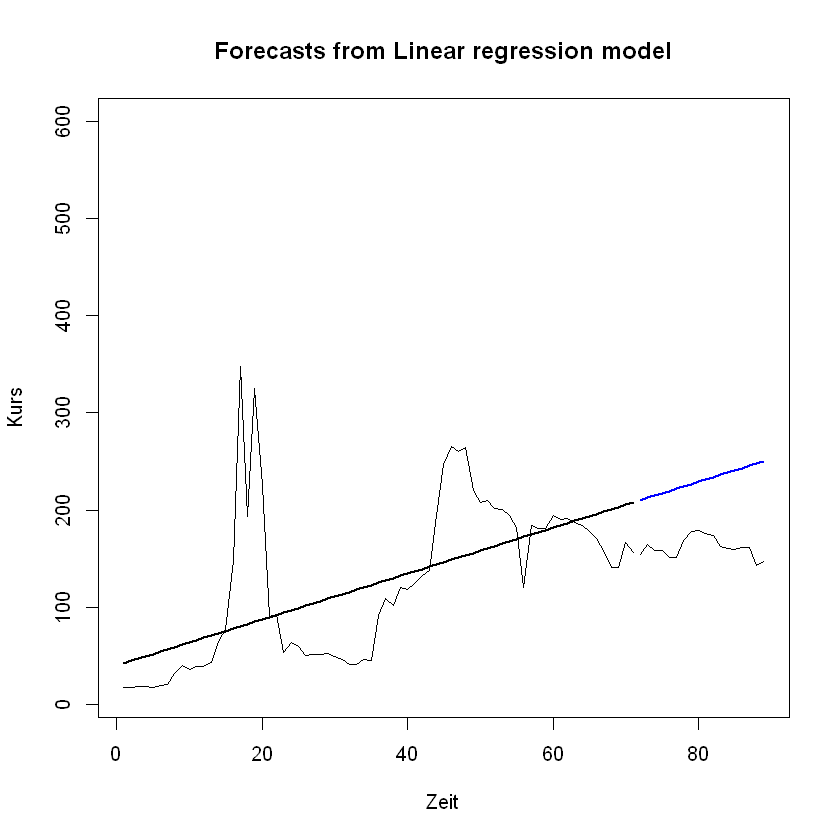

In [12]:
kurse.lm1.pred <-forecast(kurse.lm1, h = stepsAhead, level=0)
plot(kurse.lm1.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,600))
lines(kurse.lm1.pred$fitted, lwd=2)
lines(valid.kurse.ts)
accuracy(kurse.lm1.pred$mean, valid.kurse.ts)

Forecasts mit polynomialem Trend 2. Ordnung

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-20.80828,22.8421,20.80828,-13.2842,13.2842,0.6208026,2.875387


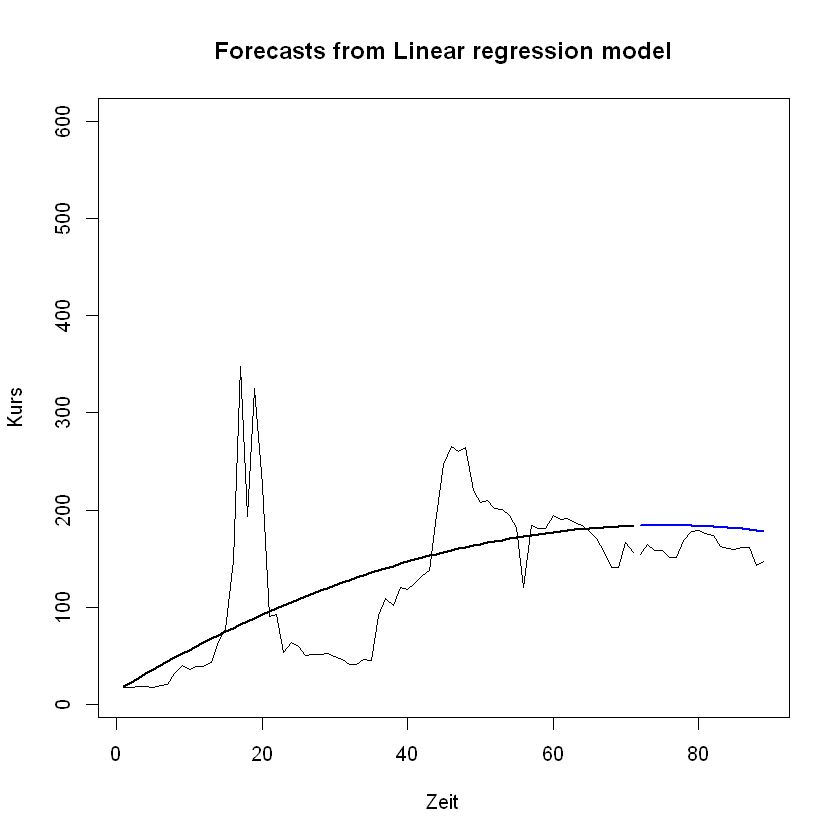

In [13]:
kurse.lm2.pred <-forecast(kurse.lm2, h = stepsAhead, level=0)
plot(kurse.lm2.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,600))
lines(kurse.lm2.pred$fitted, lwd=2)
lines(valid.kurse.ts)
accuracy(kurse.lm2.pred$mean, valid.kurse.ts)

Forecasts mit polynomialem Trend 3. Ordnung

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,38.86529,48.48738,39.86909,24.07054,24.71945,0.8195528,6.238124


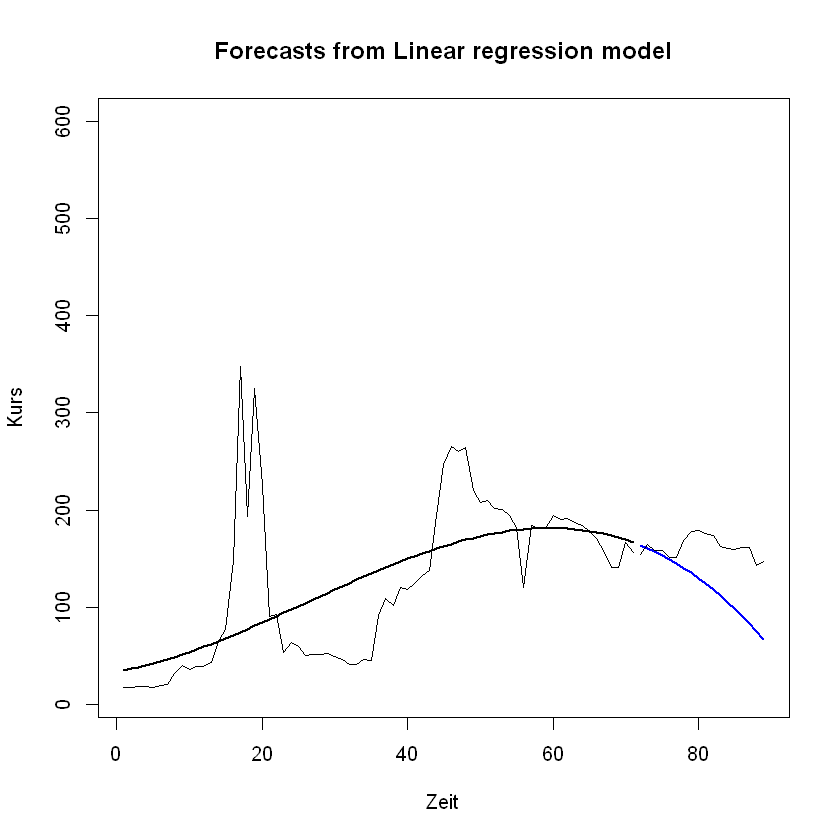

In [14]:
kurse.lm3.pred <-forecast(kurse.lm3, h = stepsAhead, level=0)
plot(kurse.lm3.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,600))
lines(kurse.lm3.pred$fitted, lwd=2)
lines(valid.kurse.ts)
accuracy(kurse.lm3.pred$mean, valid.kurse.ts)

Es zeigt sich, dass der polynomiale Trend 2. Ordnung am besten abschneidet, mit einem MAE von 20.81 und einem MAPE von 13.28


Regression mit Kursdaten und Kommentaren

Nun testen wir, ob mithilfe der Kombination aus Kursdaten und Kommentaren noch bessere Ergbenisse erzielt werden können. Auch hier trennen wir die Daten wieder in Trainings- und Validierungsdaten auf.
Einfügen der Daten in TimeSeries-Objekt

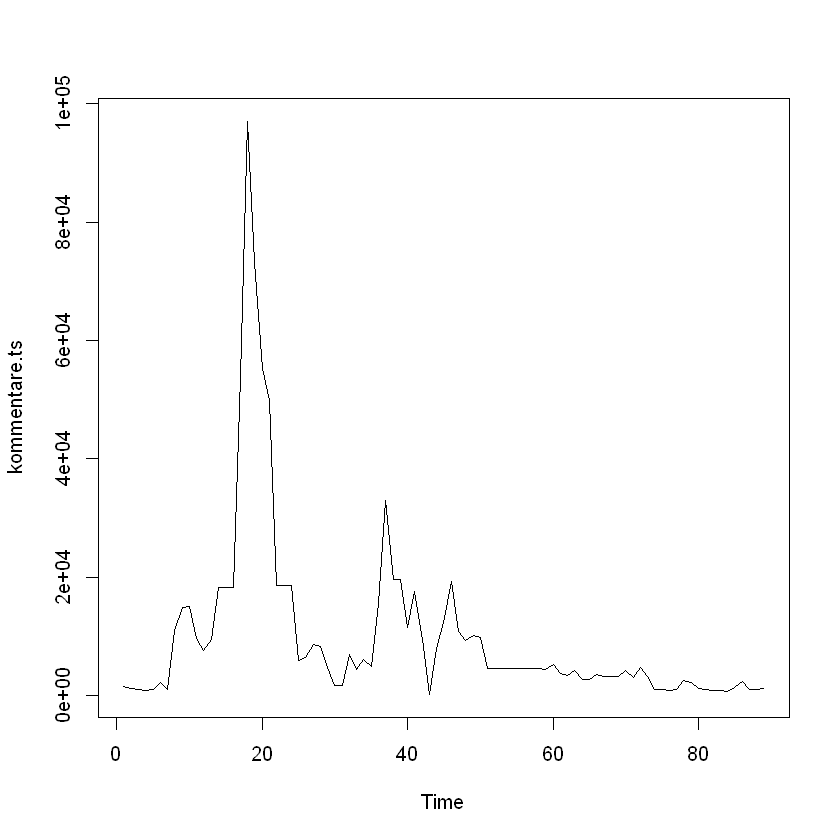

In [15]:
kommentare.ts<-ts(GME$Anzahl)
plot(kommentare.ts)

Trennung in Trainingsdaten und Validierungsdaten

In [16]:
train.kommentare.ts <-window(kommentare.ts, start = 1, end = c(1, nTrain))
valid.kommentare.ts <-window(kommentare.ts, start = c(1, nTrain +1), end = c(1, nTrain+stepsAhead))

Wir führen die Regression sowohl ohne Einbeziehung eines Trends, als auch mit einem Linearen Trend durch.
Regression mit Kommentaren


Call:
tslm(formula = train.kurse.ts ~ train.kommentare.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.810 -71.695  -9.762  73.303 153.123 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.047e+02  1.144e+01   9.154 1.56e-13 ***
train.kommentare.ts 1.668e-03  5.528e-04   3.018  0.00356 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 77.85 on 69 degrees of freedom
Multiple R-squared:  0.1166,	Adjusted R-squared:  0.1038 
F-statistic: 9.109 on 1 and 69 DF,  p-value: 0.003562


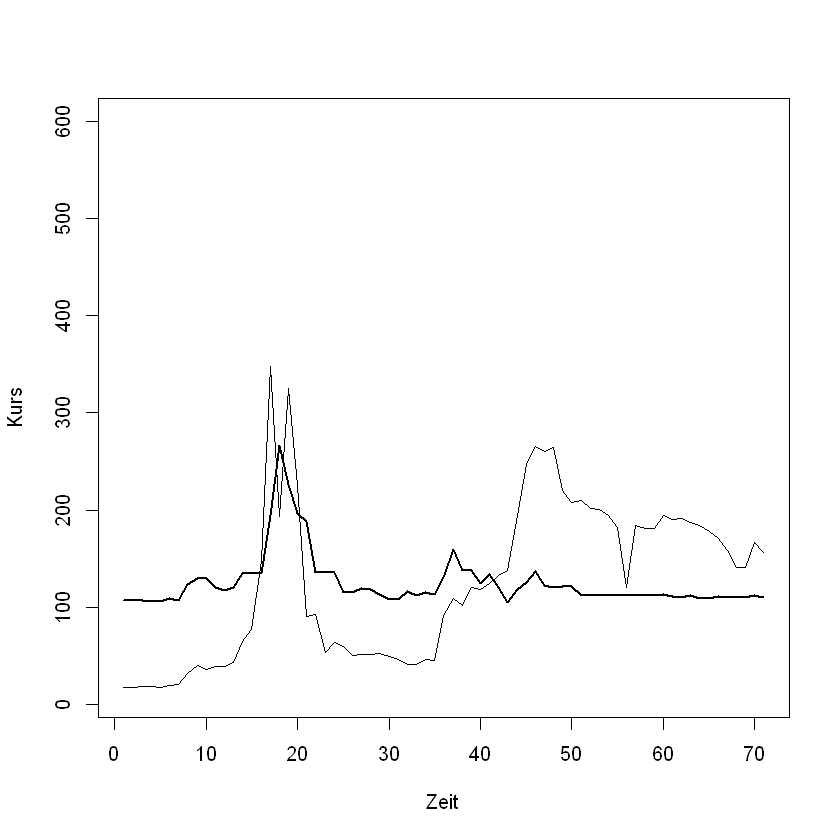

In [17]:
kursekommentare.lm1 <- tslm(train.kurse.ts~train.kommentare.ts)
summary(kursekommentare.lm1)
plot(train.kurse.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(kursekommentare.lm1$fitted, lwd = 2)

Regression mit Kommentaren + linearer Trend


Call:
tslm(formula = train.kurse.ts ~ train.kommentare.ts + trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.836  -37.087   -4.687   21.763  167.708 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.426e+01  1.440e+01  -0.990    0.326    
train.kommentare.ts  2.672e-03  3.761e-04   7.106 9.12e-10 ***
trend                2.964e+00  3.067e-01   9.665 2.16e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50.9 on 68 degrees of freedom
Multiple R-squared:  0.6279,	Adjusted R-squared:  0.6169 
F-statistic: 57.36 on 2 and 68 DF,  p-value: 2.537e-15


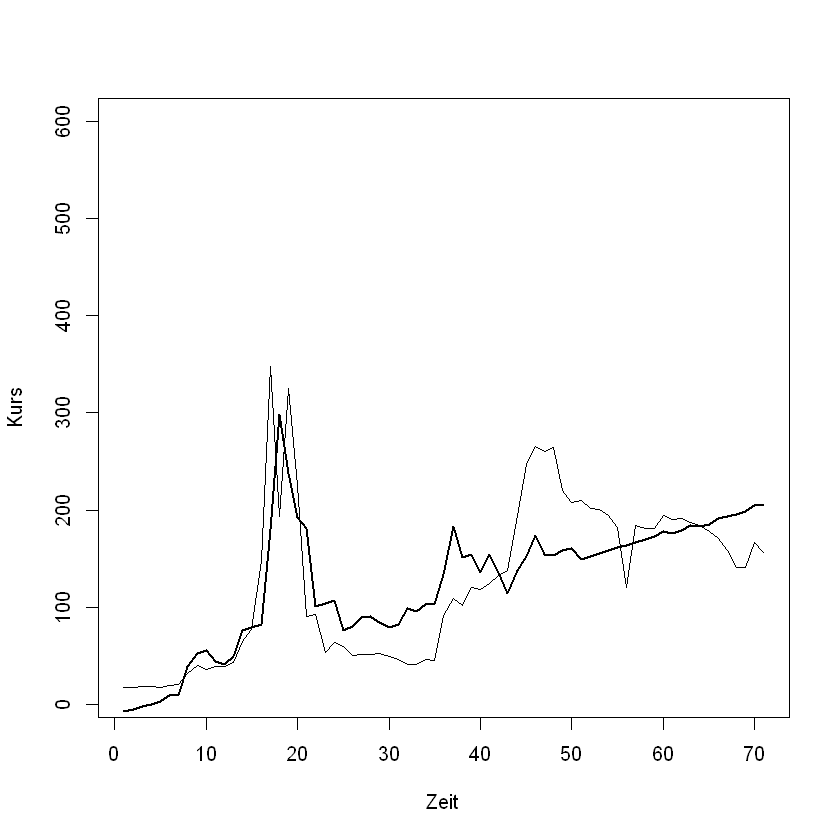

In [18]:
kursekommentare.lm2 <- tslm(train.kurse.ts~train.kommentare.ts+trend)
summary(kursekommentare.lm2)
plot(train.kurse.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(kursekommentare.lm2$fitted, lwd = 2)

Wir prüfen die Performance der beiden Modelle wieder mithilfe der Validierungsdaten
Forecasts mit Kommentaren

Warning message in forecast.lm(kursekommentare.lm1, newdata = valid.kommentare.ts, :
"newdata column names not specified, defaulting to first variable required."

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,54.24987,55.18261,54.24987,33.32502,33.32502,0.6289784,6.863633


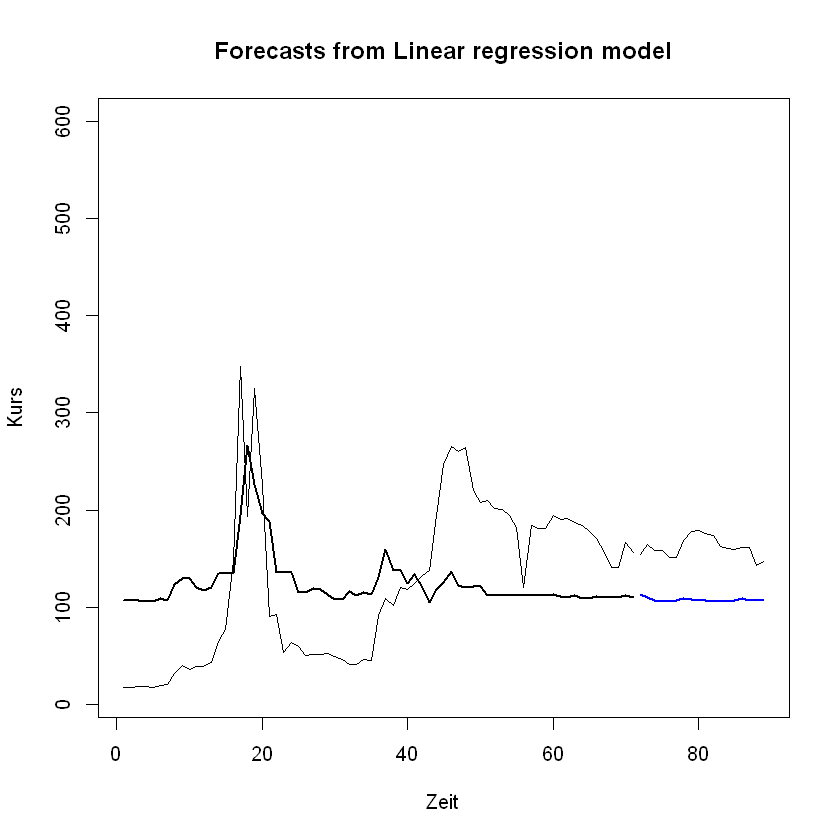

In [19]:
kursekommentare.lm1.pred<-forecast(kursekommentare.lm1,newdata = valid.kommentare.ts, h =stepsAhead, level = 0)
plot(kursekommentare.lm1.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,600))
lines(kursekommentare.lm1.pred$fitted, lwd=2)
lines(valid.kurse.ts)
accuracy(kursekommentare.lm1.pred$mean, valid.kurse.ts)

Forecasts mit Kommentaren + linearer Trend

Warning message in forecast.lm(kursekommentare.lm2, newdata = valid.kommentare.ts, :
"newdata column names not specified, defaulting to first variable required."

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-66.98984,69.57016,66.98984,-42.10778,42.10778,0.7810006,8.8959


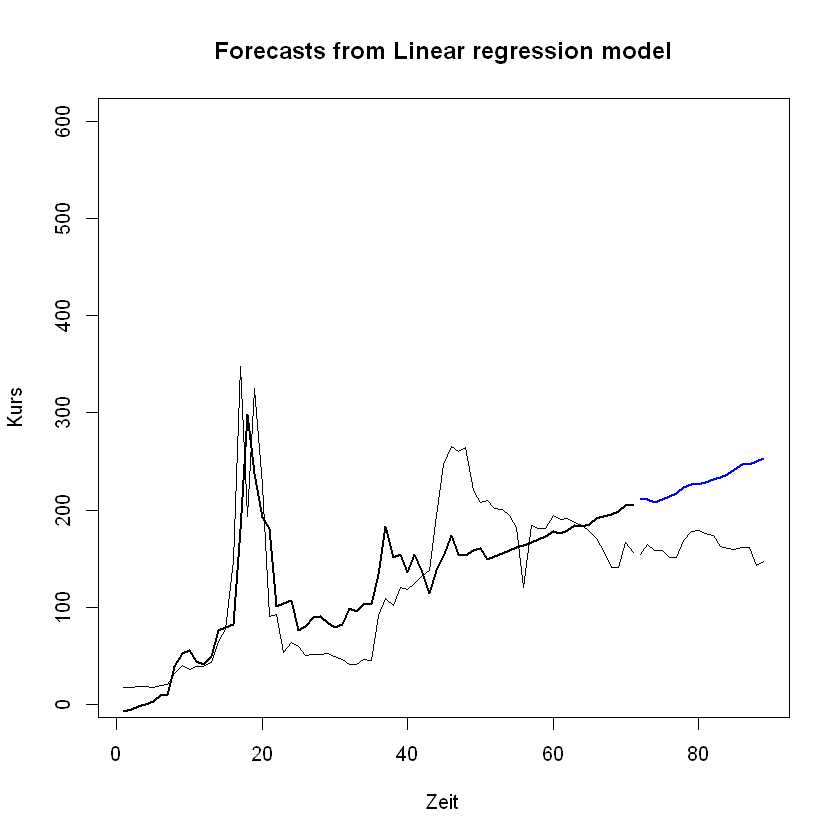

In [20]:
kursekommentare.lm2.pred<-forecast(kursekommentare.lm2,newdata = valid.kommentare.ts, h =stepsAhead, level = 0)
plot(kursekommentare.lm2.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,600))
lines(kursekommentare.lm2.pred$fitted, lwd=2)
lines(valid.kurse.ts)
accuracy(kursekommentare.lm2.pred$mean, valid.kurse.ts)

Das Modell ohne Einbeziehung eines Trends schneidet am besten ab, mit einem MAE von 54.25 und einem MAPE von 33.32


Fazit:
Man kann anhand der Performancemaße erkennen, das bei der Regression die Hinzunahme von Kommentardaten nicht zu besseren Ergebnissen führt. Das die Lineare Regression aber ohnehin nicht besonders geeignet für das Problem ist, lässt sich bereits am Graphen der Kursdaten erkennen. Insofern war mit dem eher schlechten Ergebnis zu rechnen.

# Arima - von Manuel Knepper und Simon Faltenberg

erstellung der Variablen

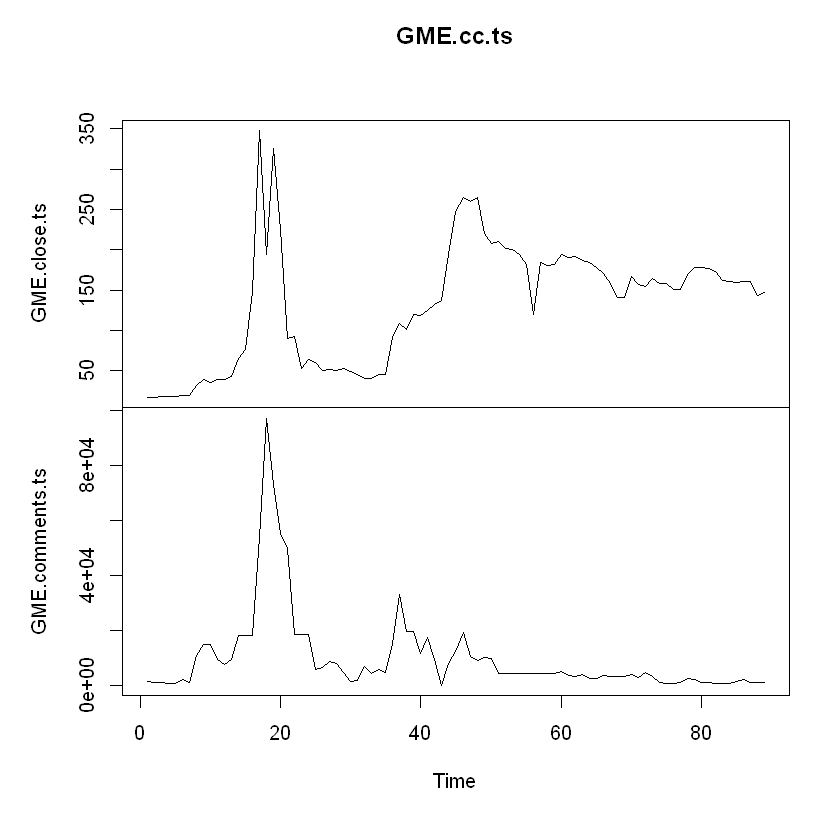

In [29]:
GME.close.ts <- ts(GME$Close)
GME.comments.ts <- ts(GME$Anzahl)
GME.cc.ts <- ts.union(GME.close.ts, GME.comments.ts) 
plot(GME.cc.ts)

In [30]:
GME.close.ts <- ts(GME$Close)

Trennung in Traingsdaten und Validierungsdaten

In [31]:
stepsAhead <-18 #Anzahl Prognosetage
nTrain <-length(kurse.ts) - stepsAhead
train.close.ts <-window(GME.close.ts, start = 1, end = c(1, nTrain))
valid.close.ts <-window(GME.close.ts, start = c(1, nTrain +1), end = c(1, nTrain+stepsAhead))

Arima nur mit Kursdaten

Es wird nur mit den Kursdaten gearbeitet, da durch das Nutzen des Trendes ein viel schlechteres Ergebnis erreicht werden würde. Das Arima Modell hatte durch den Trend auch Werte unter 0 vorhergesagt und der MAPE-Wert war weit über 100.
Einen Saisonalen Effekt gibt es auch nicht, weswegen dieser auch nicht beachtet wird.

Series: train.close.ts 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.2445
s.e.   0.1149

sigma^2 estimated as 1874:  log likelihood=-362.61
AIC=729.23   AICc=729.41   BIC=733.72

Training set error measures:
                  ME     RMSE      MAE        MPE     MAPE      MASE       ACF1
Training set 2.47477 42.67973 21.25238 -0.4099237 15.98908 0.9824965 0.02207098


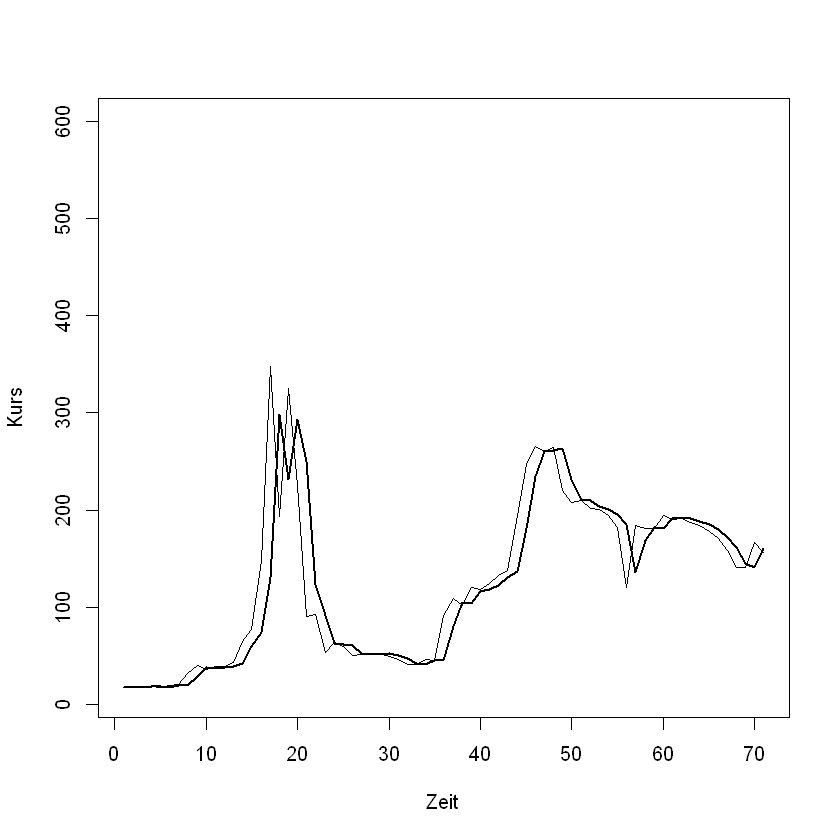

In [32]:
close.arima <- auto.arima(train.close.ts)
summary(close.arima)
plot(train.close.ts, xlab="Zeit", ylab="Kurs",ylim=c(10,600))
lines(close.arima$fitted, lwd = 2)

Forecast Arima nur mit Kursdaten

In der Arima-Prediction wird kein Anstieg oder Abfall des Kurswertes prognostiziert. Das Modell hat ein Wert ermittelt, der grob den Durschnitt wiedergibt und so ein gutes Ergebnis erzielt.

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,3.121318,10.52644,8.167886,1.553059,4.970792,0.631917,1.30012


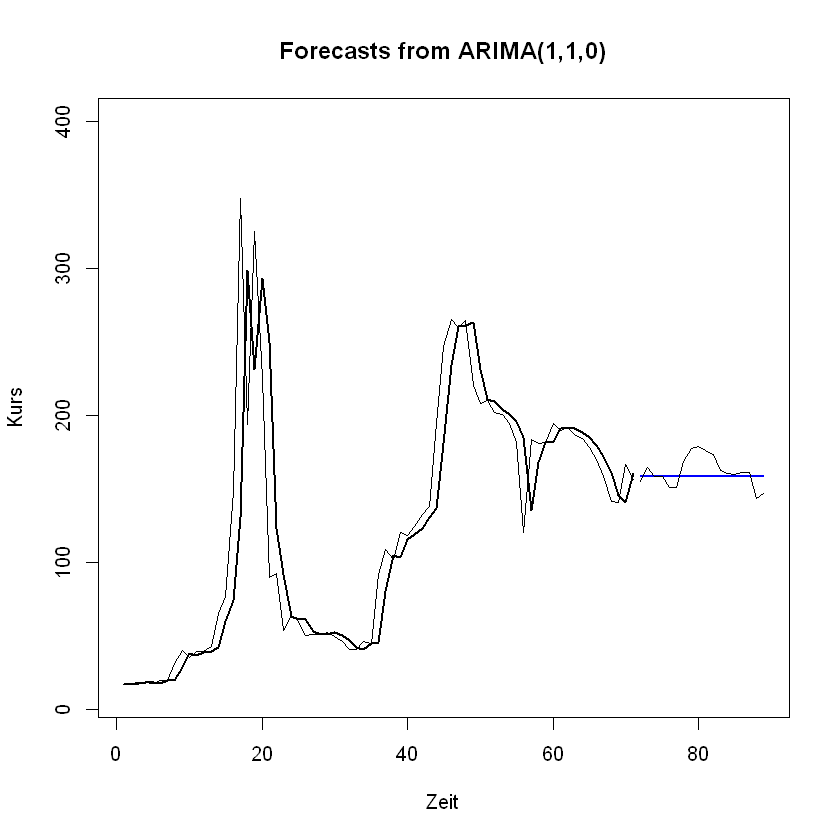

In [33]:
close.arima.pred <- forecast(close.arima, h = stepsAhead, level=0)
plot(close.arima.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(10,400))
lines(close.arima.pred$fitted, lwd=2)
lines(valid.close.ts)
accuracy(close.arima.pred$mean, valid.close.ts)

Trennung in Trainingsdaten und Validierungsdaten

In [45]:
train.comments.ts <-window(GME.comments.ts, start = 1, end = c(1, nTrain))
valid.comments.ts <-window(GME.comments.ts, start = c(1, nTrain +1), end = c(1, nTrain+stepsAhead))

In [46]:
train.cc.ts <- window(GME.cc.ts, start = 1, end = c(1, nTrain))
valid.cc.ts <-window(GME.cc.ts, start = c(1, nTrain +1), end = c(1, nTrain+stepsAhead))

tslm Durchführung mit Kursdaten und Kommentaren

Da man in Arima keine Korrelationen in Modelle einbauen kann, wird dafür zuerst ein tsml-Model genutzt. Es wird ein Trend^2 genutzt, da dieser wie man in der Summary sehen kann, eine hohes Signifikanzniveau hat.

In [47]:
closecomments.tsml <- tslm(train.close.ts~train.comments.ts+ I(trend^2))
summary(closecomments.tsml)
plot


Call:
tslm(formula = train.close.ts ~ train.comments.ts + I(trend^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-118.518  -31.251   -9.869   17.780  160.105 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.285e+01  1.201e+01   1.904   0.0612 .  
train.comments.ts 2.850e-03  3.993e-04   7.136 8.06e-10 ***
I(trend^2)        3.930e-02  4.383e-03   8.966 3.89e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 53.09 on 68 degrees of freedom
Multiple R-squared:  0.5952,	Adjusted R-squared:  0.5833 
F-statistic: 49.99 on 2 and 68 DF,  p-value: 4.432e-14


function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x000000002a51d400>
<environment: namespace:graphics>

Plot Arima mit Kommentaren und Kursdaten

Arima mit Kursdaten und Kommentaren

Das tsml-Model nutzen wir jetzt für Arima, da Arima damit umgehen kann. Leider verschlechtert sich aber das Modell, da es annimmt, dass der Kurswert auch im negativen Bereich sein kann.

In [48]:
closecomments.arima <- auto.arima(closecomments.tsml$residual)
summary(closecomments.arima)

Series: closecomments.tsml$residual 
ARIMA(1,0,3) with zero mean 

Coefficients:
         ar1      ma1     ma2     ma3
      0.7019  -0.4468  0.2035  0.2871
s.e.  0.2032   0.2665  0.1683  0.1757

sigma^2 estimated as 1507:  log likelihood=-359.04
AIC=728.08   AICc=729   BIC=739.39

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.8108396 37.70624 23.63637 -43.94973 150.6829 0.9236618
                    ACF1
Training set -0.03702451


Arima mit Kursdaten und Kommentaren

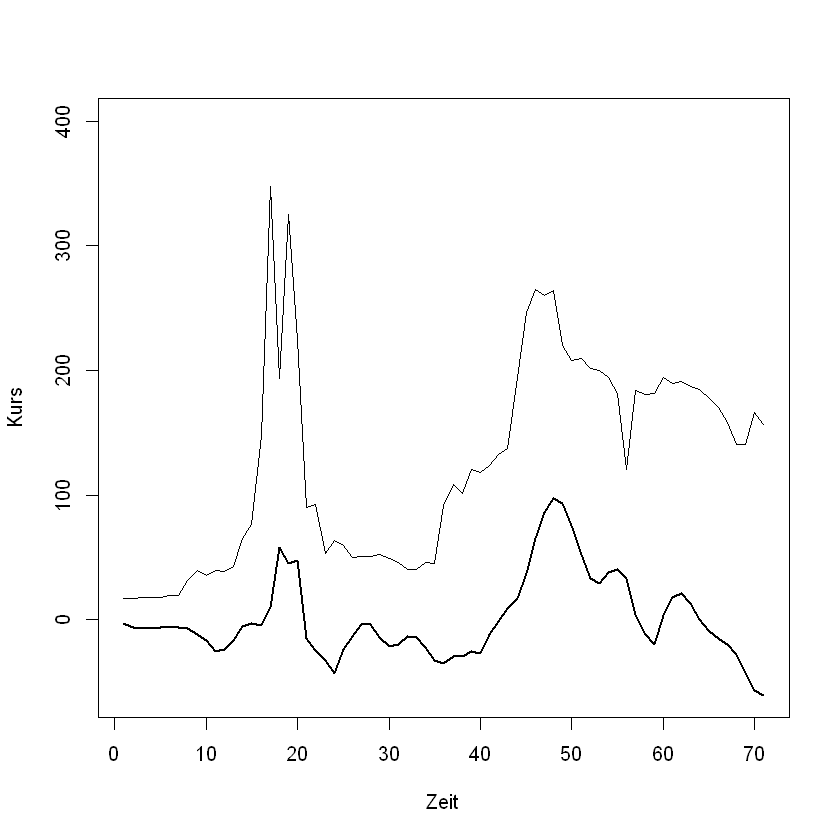

In [49]:
plot(train.close.ts, xlab="Zeit", ylab="Kurs",ylim=c(-60,400))
lines(closecomments.arima$fitted, lwd = 2)

Forecast Arima mit Kursdaten und Kommentaren

In der Prediction sieht man, das Arima jetzt keine einfache Gerade angegeben hat, sondern das auch ein Trend erkennbar ist. Es wird vorhergesagt, das die Kursdaten etwas nach oben gehen werden. Allerdings ist die Prediction durch das Model unbrauchbar, da sich diese um den Nullpunkt der y-Achse hält.

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,173.5157,174.4391,173.5157,107.5092,107.5092,0.6974179,21.40994


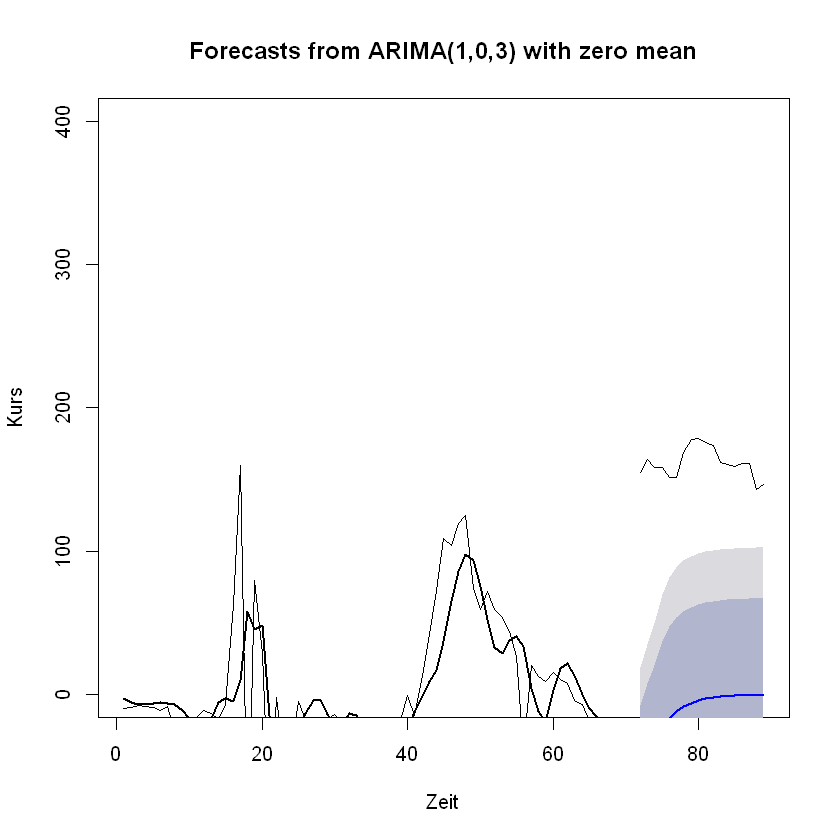

In [42]:
closecomments.arima.pred <- forecast(closecomments.arima, h = 18)
plot(closecomments.arima.pred, ylab = "Kurs", xlab = "Zeit",ylim = c(0,400))
lines(closecomments.arima.pred$fitted, lwd=2)
lines(valid.close.ts)
accuracy(closecomments.arima.pred$mean, valid.close.ts)

Fazit:
Das Arima Modell hat nur mit den Kursdaten ganz gut abgeschnitten. Der MAE Wert beträgt: 8.168 und MAPE: 4.97. Allerdings wäre es in der Praxis nicht so gut, da das Modell eine Gerade erzeugt hat, ohne Anstieg oder Abfall. Ein Trend ist daher nicht erkennbar, weshalb ich anhand dieses Modelles kein Geld in GME investieren würde.
Arima mit Kursdaten und Kommentaren, sieht im ersten Moment ganz passabel aus, allerdings ist dieses Modell nach unten verschoben, wodurch es zu sehr großen Abweichungen beim MAE und MAPE kommt. 
Wenn man Arima nutzen will, dann nur unter Verwendung der Kursdaten und ohne weitere Attribute.